In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_customers = pd.read_csv('datas/olist_customers_dataset.csv')
df_geolocation = pd.read_csv('datas/olist_geolocation_dataset.csv')
df_order_items = pd.read_csv('datas/olist_order_items_dataset.csv')
df_order_payments = pd.read_csv('datas/olist_order_payments_dataset.csv')
df_order_reviews = pd.read_csv('datas/olist_order_reviews_dataset.csv')
df_orders = pd.read_csv('datas/olist_orders_dataset.csv')
df_products = pd.read_csv('datas/olist_products_dataset.csv')
df_sellers = pd.read_csv('datas/olist_sellers_dataset.csv')
df_category_name_translation = pd.read_csv('datas/product_category_name_translation.csv')




df_order_items.info()
df_order_reviews.info()
df_orders.info()
df_products.info()
df_category_name_translation.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int

### Extraction des données

## Structure des données


# Customer
- **Customer ID:** [customer_id]
- **Customer Unique ID:** [customer_unique_id]
- **Zip Code Prefix:** [customer_zip_code_prefix]
- **City:** [customer_city]
- **State:** [customer_state]

# Geolocation
- **Zip Code Prefix:** [geolocation_zip_code_prefix]
- **Latitude:** [geolocation_lat]
- **Longitude:** [geolocation_lng]
- **City:** [geolocation_city]
- **State:** [geolocation_state]

# Order Items
- **Order ID:** [order_id]
- **Order Item ID:** [order_item_id]
- **Product ID:** [product_id]
- **Seller ID:** [seller_id]
- **Shipping Limit Date:** [shipping_limit_date]
- **Price:** [price]
- **Freight Value:** [freight_value]

# Order Payment
- **Order ID:** [order_id]
- **Payment Sequential:** [payment_sequential]
- **Payment Type:** [payment_type]
- **Payment Installments:** [payment_installments]
- **Payment Value:** [payment_value]

### Order Reviews
- **Review ID:** [review_id]
- **Order ID:** [order_id]
- **Review Score:** [review_score]
- **Review Comment Title:** [review_comment_title]
- **Review Comment Message:** [review_comment_message]
- **Review Creation Date:** [review_creation_date]
- **Review Answer Timestamp:** [review_answer_timestamp]

# Order
- **Order ID:** [order_id]
- **Customer ID:** [customer_id]
- **Order Status:** [order_status]
- **Order Purchase Timestamp:** [order_purchase_timestamp]
- **Order Approved At:** [order_approved_at]
- **Order Delivered Carrier Date:** [order_delivered_carrier_date]
- **Order Delivered Customer Date:** [order_delivered_customer_date]
- **Order Estimated Delivery Date:** [order_estimated_delivery_date]

# Products
- **Product ID:** [product_id]
- **Product Category Name:** [product_category_name]
- **Product Name Length:** [product_name_length]
- **Product Description Length:** [product_description_length]
- **Product Photos Qty:** [product_photos_qty]
- **Product Weight (g):** [product_weight_g]
- **Product Length (cm):** [product_length_cm]
- **Product Height (cm):** [product_height_cm]
- **Product Width (cm):** [product_width_cm]

# Sellers
- **Seller ID:** [seller_id]
- **Seller Zip Code Prefix:** [seller_zip_code_prefix]
- **Seller City:** [seller_city]
- **Seller State:** [seller_state]



### Analyse de données

## Analyse des notes de vente et voir à quel point une bonne note augmente les ventes


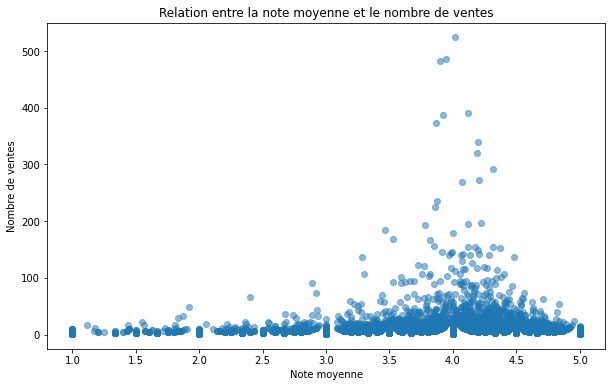

In [3]:
df_merged = pd.merge(df_order_items, df_order_reviews, on='order_id')
df_merged = pd.merge(df_merged, df_products, on='product_id')

# Moyenne des notes pour chaque produit
product_rating_mean = df_merged.groupby('product_id')['review_score'].mean()

# Nombre de ventes pour chaque produit
product_sales_count = df_merged.groupby('product_id').size()

df_rating_sales = pd.concat([product_rating_mean, product_sales_count], axis=1)
df_rating_sales.columns = ['average_rating', 'sales_count']


plt.figure(figsize=(10, 6))
plt.scatter(df_rating_sales['average_rating'], df_rating_sales['sales_count'], alpha=0.5)
plt.title('Relation entre la note moyenne et le nombre de ventes')
plt.xlabel('Note moyenne')
plt.ylabel('Nombre de ventes')
plt.show()

# Trier le DataFrame par ordre décroissant de nombre de ventes
df_rating_sales_sorted = df_rating_sales.sort_values(by='sales_count', ascending=False)

# Exporter le DataFrame trié en CSV
df_rating_sales_sorted.to_csv('rating_sales_sorted.csv', index=True)



/tmp/ipykernel_100041/2219721963.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_mean = df_rating_sales.groupby(pd.cut(df_rating_sales['average_rating'], bins))['sales_count'].mean()


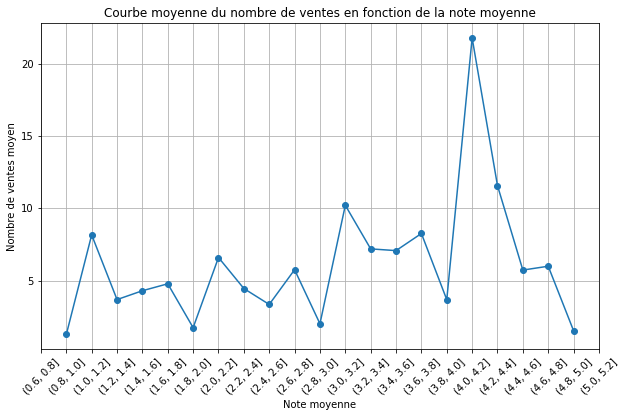

In [4]:
bins = np.arange(0, 6, 0.2)
sales_mean = df_rating_sales.groupby(pd.cut(df_rating_sales['average_rating'], bins))['sales_count'].mean()

plt.figure(figsize=(10, 6))
plt.plot(sales_mean.index.astype(str), sales_mean.values, marker='o', linestyle='-')
plt.title('Courbe moyenne du nombre de ventes en fonction de la note moyenne')
plt.xlabel('Note moyenne')
plt.ylabel('Nombre de ventes moyen')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [7]:
# Calculer le nombre de ventes par produit
product_sales_count = df_order_items['product_id'].value_counts()

# Calculer la moyenne des notes des produits
product_rating_mean = df_order_reviews.groupby('order_id')['review_score'].mean()
product_rating_mean = df_order_items.merge(product_rating_mean, on='order_id', how='left').groupby('product_id')['review_score'].mean()

# Créer un DataFrame contenant le nombre de ventes et la note moyenne par produit
df_sales_rating = pd.DataFrame({'sales_count': product_sales_count, 'average_rating': product_rating_mean})


# Calculer le coefficient de corrélation
correlation_coefficient = df_sales_rating['sales_count'].corr(df_sales_rating['average_rating'])

print("Coefficient de corrélation entre le nombre de ventes et la note moyenne :", correlation_coefficient)


Coefficient de corrélation entre le nombre de ventes et la note moyenne : -0.004205202986995382


In [8]:
df_sales_rating

,sales_count,average_rating
product_id,,
00066f42aeeb9f3007548bb9d3f33c38,1,5.0
00088930e925c41fd95ebfe695fd2655,1,4.0
0009406fd7479715e4bef61dd91f2462,1,1.0
000b8f95fcb9e0096488278317764d19,2,5.0
000d9be29b5207b54e86aa1b1ac54872,1,5.0
...,...,...
fff6177642830a9a94a0f2cba5e476d1,2,4.5
fff81cc3158d2725c0655ab9ba0f712c,1,4.0
fff9553ac224cec9d15d49f5a263411f,1,5.0


In [6]:
# Compter le nombre de revues par produit
df_order_items.info()
# Calculer la proportion du nombre de revues par rapport au nombre de ventes
##review_sales_proportion = product_review_count / product_sales_count


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
